In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
iris = datasets.load_iris()

#Laboratorio 6

##Marhia José Granada Restrepo

###1094890344

# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$

Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

##Estrategia de solución.

###1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```

In [190]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Mini dataset analysis:

* Samples: 150, 50 of each category
* Attributes:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
* Target: 3 classes:
    - Iris-Setosa (0)
    - Iris-Versicolour (1)
    - Iris-Virginica (2)
* No missing values

###2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.


In [191]:
data = iris.data
names_features = iris.feature_names
target = iris.target
df = pd.DataFrame(data, columns=names_features)
df["Target"] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```



In [192]:
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
df.columns = cols
df.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Target          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [203]:
df.describe()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target,SetosaBinary
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,1.000000


In [204]:
df.isnull().sum()

,0
SepalLength_cm,0
SepalWidth_cm,0
PetalLength_cm,0
PetalWidth_cm,0
Target,0
SetosaBinary,0


There are no null values, 150 rows and 5 columns (as mentioned earlier), and are all numerical columns.

###5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion


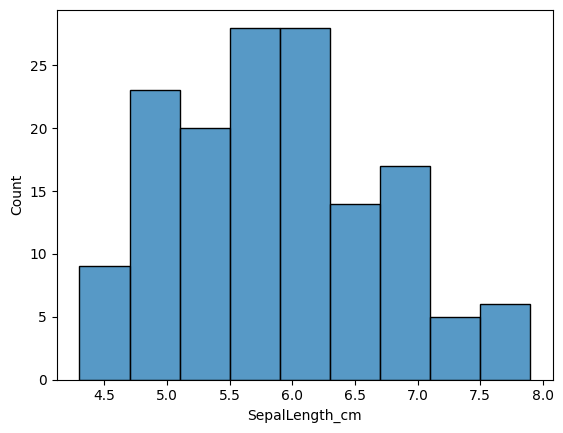

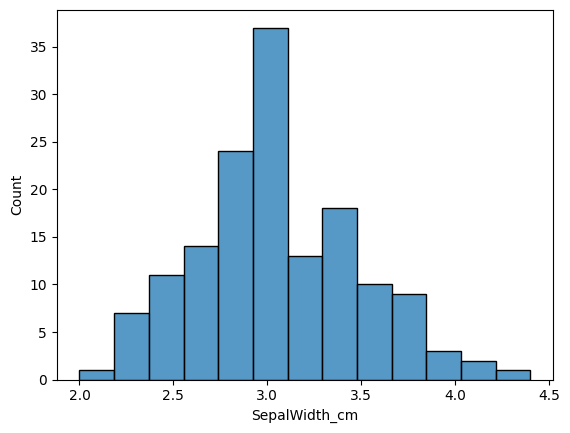

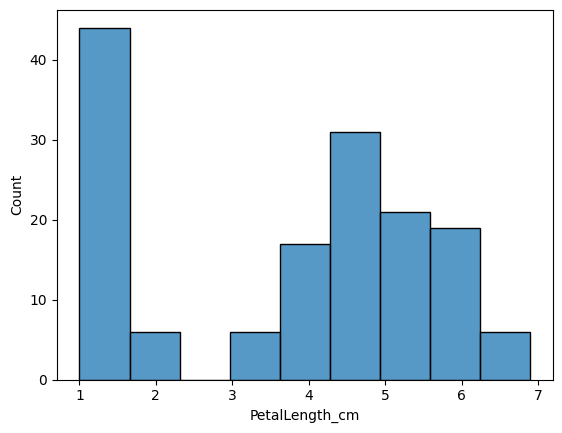

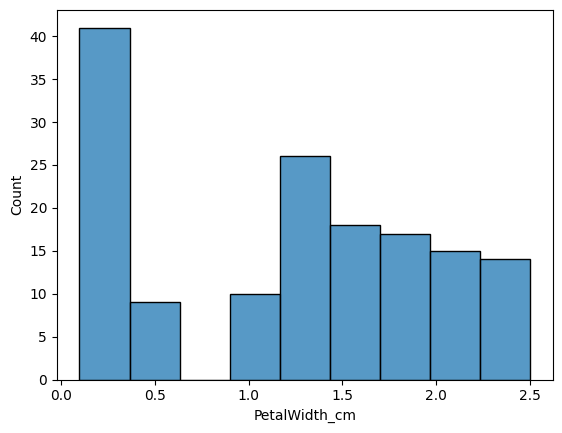

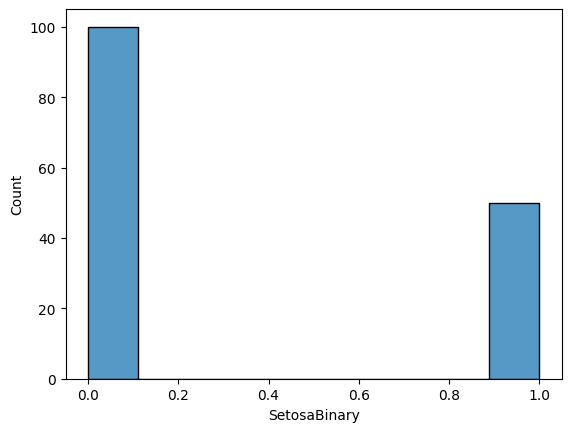

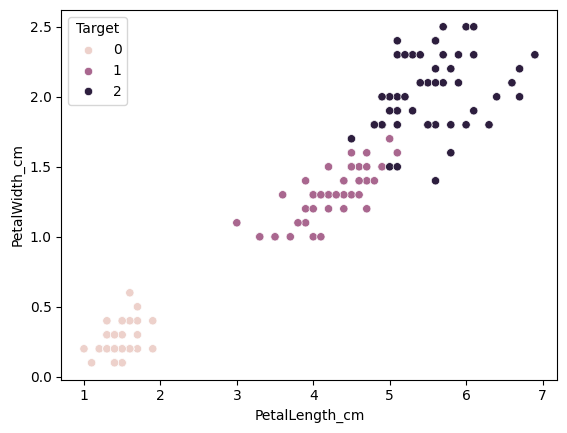

In [205]:
FeatCols = df.columns.drop("Target")
for col in FeatCols:
  sns.histplot(df[col])
  plt.show()
sns.scatterplot(data=df, x="PetalLength_cm", y="PetalWidth_cm", hue="Target")
plt.show()

In [206]:
df.corr()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target,SetosaBinary
SepalLength_cm,1.000000,-0.117570,0.871754,0.817941,0.782561,-0.717416
SepalWidth_cm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658,0.603348
PetalLength_cm,0.871754,-0.428440,1.000000,0.962865,0.949035,-0.922765
PetalWidth_cm,0.817941,-0.366126,0.962865,1.000000,0.956547,-0.887344
Target,0.782561,-0.426658,0.949035,0.956547,1.000000,-0.866025
SetosaBinary,-0.717416,0.603348,-0.922765,-0.887344,-0.866025,1.000000


According to the graphs shown here and also the correlation matrix, we can see some stuff:

* The Sepal Length seems to be mainly distributed between approximately 4.5cm and 7cm, with some outilers around 8cm.
* Most of the Sepal Width is around 3cm.
* Petal Legth has a really big group concentrated in 1cm and another one around 5cm
* From the PetalWidth vs Petal Length scatterplot and correlation matrix it can be observed that these two features are strongly correlated, and form clustters that differentiate the different classes

###6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

<Axes: >

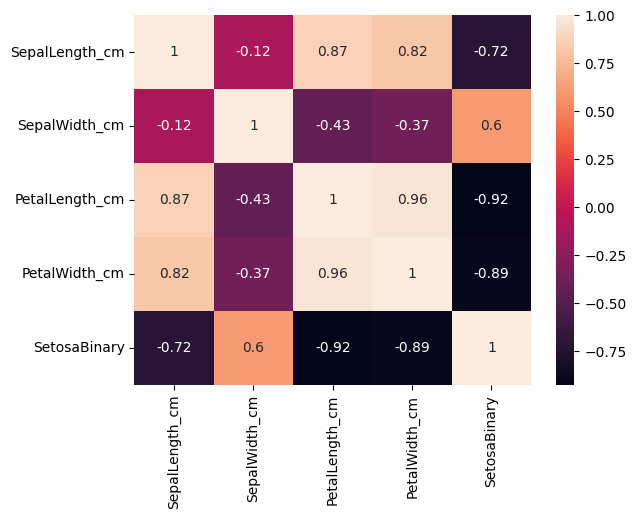

In [207]:
corr = df[FeatCols].corr()
sns.heatmap(corr, annot=True)

###7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?


In [208]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [209]:
print(strat_test_set.shape)
print(strat_train_set.shape)

(30, 6)
(120, 6)


The train/test sets are divided using a Stratified random split which preserves the distribution of the original dataset, where 80% of the data is going to the train set and the other 20% is going to the test set

###8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.



In [210]:
#Separate classes
df["SetosaBinary"] = (df["Target"] == 0).astype(int)

#Run split again (for Setosa)

for train_index, test_index in split.split(df, df["SetosaBinary"]):
  strat_train_setosa = df.loc[train_index]
  strat_test_setosa = df.loc[test_index]

log_reg = LogisticRegression(random_state=42)
X_train = strat_train_setosa.drop(["Target", "SetosaBinary"], axis=1)
y_train = strat_train_setosa["SetosaBinary"]
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

###9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```



In [212]:
X_new = np.linspace(-10, 10, 1000).reshape(-1, 4)
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2.25225225, 2.27227227, 2.29229229, 2.31231231])

It's a 4d space that delimits 0.5 for probabilities of setosa vs not setosa

###10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad

Given that there are 4 features, the graph would be a 4d space, so I built a graph with only 2 features, and set the other 2 to their mean values, and then graphed the probabilities for these 2 feaures

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


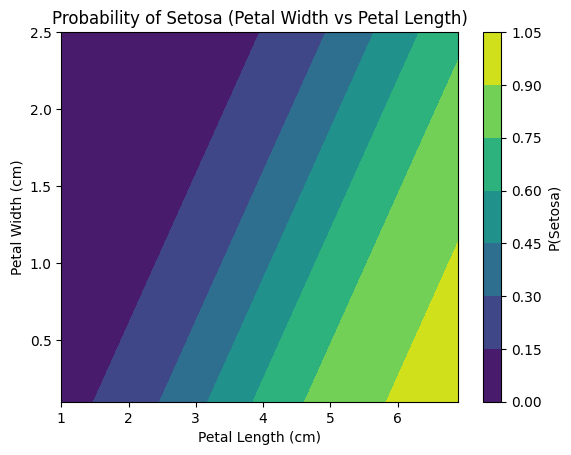

In [213]:
sepal_length_mean = df["SepalLength_cm"].mean()
sepal_width_mean = df["SepalWidth_cm"].mean()

petal_length_range = np.linspace(df["PetalLength_cm"].min(), df["PetalLength_cm"].max(), 200)
petal_width_range = np.linspace(df["PetalWidth_cm"].min(), df["PetalWidth_cm"].max(), 200)

sw, pw = np.meshgrid(petal_length_range, petal_width_range)

X_grid = np.c_[np.full(sw.ravel().shape, sepal_length_mean),sw.ravel(),np.full(sw.ravel().shape, sepal_width_mean),pw.ravel()]

probs = log_reg.predict_proba(X_grid)[:, 1]
probs = probs.reshape(sw.shape)

plt.contourf(sw, pw, probs)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Probability of Setosa (Petal Width vs Petal Length)")
plt.colorbar(label="P(Setosa)")
plt.show()

###11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


A = Setosa

B = Versicolour

C = Virginica

In [214]:
#Drop Setosa binary as it's no longer needeed

df.drop(["SetosaBinary"], axis=1, inplace=True)

In [215]:
#Copy the df
df_A = df.copy()
df_B = df.copy()
df_C = df.copy()

#Train for A
df_A["A_binary"] = (df_A["Target"] != 0).astype(int)

for train_index, test_index in split.split(df_A, df_A["A_binary"]):
  strat_train_A = df_A.loc[train_index]
  strat_test_A = df_A.loc[test_index]

model_A = LogisticRegression(random_state=42)
X_A_train = strat_train_A.drop(["Target", "A_binary"], axis=1)
y_A_train = strat_train_A["A_binary"]
model_A.fit(X_A_train, y_A_train)

#B
df_B["B_binary"] = (df_B["Target"] != 1).astype(int)

for train_index, test_index in split.split(df_B, df_B["B_binary"]):
  strat_train_B = df_B.loc[train_index]
  strat_test_B = df_B.loc[test_index]

model_B = LogisticRegression(random_state=42)
X_B_train = strat_train_B.drop(["Target", "B_binary"], axis=1)
y_B_train = strat_train_B["B_binary"]
model_B.fit(X_B_train, y_B_train)

#C
df_C["C_binary"] = (df_C["Target"] != 2).astype(int)

for train_index, test_index in split.split(df_C, df_C["C_binary"]):
  strat_train_C = df_C.loc[train_index]
  strat_test_C = df_C.loc[test_index]

model_C = LogisticRegression(random_state=42)
X_C_train = strat_train_C.drop(["Target", "C_binary"], axis=1)
y_C_train = strat_train_C["C_binary"]
model_C.fit(X_C_train, y_C_train)

LogisticRegression(random_state=42)

In [216]:
#mini test
test_flower = df.loc[0]
test_flower = test_flower.drop(["Target"])
test_flower = test_flower.to_frame().T

print("Probabilidad A: ",model_A.predict_proba(test_flower)[0][0])
print("Probabilidad B: ",model_B.predict_proba(test_flower)[0][0])
print("Probabilidad C: ", model_C.predict_proba(test_flower)[0][0])

Probabilidad A:  0.981471555207039
Probabilidad B:  0.13456243125915046
Probabilidad C:  2.203788948551555e-06


###12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?


In [217]:
X = np.array([[4.9,5.0, 1.8, 0.3]])
colss = df.columns
colss = colss.drop("Target")
X = pd.DataFrame(X, columns=colss)

prob_A = model_A.predict_proba(X)[0][0]
prob_B = model_B.predict_proba(X)[0][0]
prob_C = model_C.predict_proba(X)[0][0]

probsss = [prob_A, prob_B, prob_C]
probsss = [i * 100 for i in probsss]
df = pd.DataFrame({"Probabilidad (%)": probsss}, index=["Setosa", "Versicolor", "Virginica"])
df

,Probabilidad (%)
Setosa,98.655627
Versicolor,0.823354
Virginica,0.000447


# [SOFTMAX REGRESION](https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax)


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

[Referencias]  [Hand on Machine learning](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html